<a id='top'></a>

# Principal Component Analysis for Player Similarity
##### Notebook to identify similar football players using PCA-based modelling

### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 25/09/2020

![title](../../img/pca_banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
data_dir_fbref_tm = os.path.join(base_dir, 'data', 'fbref-tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to use Principle Component Analyis (PCA) to perform dimeniosnality reduction of football statistics data from the Big Five leagues, provided by StatsBomb via FBref.

This notebook uses [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, [scikit-learn](https://scikit-learn.org/stable/) for Machine Learning algorithms

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using Tableau, PowerBI, Microsoft Excel.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
The data sources...

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

### <a id='#section3.2'>3.2. Data Dictionaries</a>
The [FBref]() dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |


<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

### <a id='#section3.3'>3.3. Creating the DataFrame - scraping the data</a>
...

In [5]:
# Import data as a pandas DataFrame, df_fbref_outfield_raw

## Look for most recent CSV file
lst_files_fbref_outfield_latest = glob.glob(data_dir_fbref + '/engineered/outfield/*')    # * means all if need specific format then *.csv
filepath_fbref_outfield_latest = max(lst_files_fbref_outfield_latest, key=os.path.getctime)

## Load in most recently parsed CSV file
df_fbref_outfield_raw = pd.read_csv(filepath_fbref_outfield_latest)

### <a id='#section3.3'>3.4. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [6]:
# Display the first 5 rows of the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,2.0,2.0,180.0,0.0,...,Reims,Ligue 1,France,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender
1,Valon Berisha,xk KVX,"MF,FW",Reims,27,1993,2.0,0.0,95.0,0.0,...,Reims,Ligue 1,France,valon berisha,valon,berisha,v,KVX,Kosovo,Midfielder
2,El Bilal Touré,ml MLI,"FW,MF",Reims,18,2001,2.0,2.0,134.0,1.0,...,Reims,Ligue 1,France,el bilal toure,el,toure,e,MLI,Mali,Forward
3,Mathieu Cafaro,fr FRA,"FW,MF",Reims,23,1997,2.0,2.0,118.0,0.0,...,Reims,Ligue 1,France,mathieu cafaro,mathieu,cafaro,m,FRA,France,Forward
4,Moreto Cassamã,gw GNB,MF,Reims,22,1998,2.0,1.0,88.0,0.0,...,Reims,Ligue 1,France,moreto cassama,moreto,cassama,m,GNB,Guinea-Bissau,Midfielder


In [7]:
# Display the last 5 rows of the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.tail()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
8396,Diego Rolán,uy URU,"FW,MF",Málaga,24,1993,26.0,21.0,1947.0,5.0,...,Málaga,La Liga,Spain,diego rolan,diego,rolan,d,URU,Uruguay,Forward
8397,Esteban Rolón,ar ARG,MF,Málaga,22,1995,8.0,6.0,415.0,0.0,...,Málaga,La Liga,Spain,esteban rolon,esteban,rolon,e,ARG,Argentina,Midfielder
8398,Roberto Rosales,ve VEN,DF,Málaga,28,1988,35.0,35.0,3122.0,1.0,...,Málaga,La Liga,Spain,roberto rosales,roberto,rosales,r,VEN,Venezuela,Defender
8399,Isaac Success,ng NGA,"MF,FW",Málaga,21,1996,9.0,7.0,490.0,0.0,...,Málaga,La Liga,Spain,isaac success,isaac,success,i,NGA,Nigeria,Midfielder
8400,Miguel Torres,es ESP,DF,Málaga,31,1986,8.0,8.0,672.0,0.0,...,Málaga,La Liga,Spain,miguel torres,miguel,torres,m,ESP,Spain,Defender


In [8]:
# Print the shape of the raw DataFrame, df_fbref_outfield_raw
print(df_fbref_outfield_raw.shape)

(8401, 162)


In [9]:
# Print the column names of the raw DataFrame, df_fbref_outfield_raw
print(df_fbref_outfield_raw.columns)

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'team_name', 'league_name', 'league_country', 'player_lower',
       'firstname_lower', 'lastname_lower', 'firstinitial_lower',
       'nationality_code', 'nationality_cleaned', 'position_cleaned'],
      dtype='object', length=162)


In [10]:
# Print the column names of the raw DataFrame, df_fbref_outfield_raw
print(df_fbref_outfield_raw.columns)

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'team_name', 'league_name', 'league_country', 'player_lower',
       'firstname_lower', 'lastname_lower', 'firstinitial_lower',
       'nationality_code', 'nationality_cleaned', 'position_cleaned'],
      dtype='object', length=162)


The dataset has six features (columns). Full details of these attributes can be found in the Outfielder [Data Dictionary](section3.3.1).

In [11]:
# Displays all one hundered and four columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_outfield_raw.dtypes)

player                          object
nationality                     object
position                        object
squad                           object
age                              int64
birth_year                       int64
games                          float64
games_starts                   float64
minutes                        float64
goals                          float64
assists                        float64
pens_made                      float64
pens_att                       float64
cards_yellow                   float64
cards_red                      float64
goals_per90                    float64
assists_per90                  float64
goals_assists_per90            float64
goals_pens_per90               float64
goals_assists_pens_per90       float64
xg                             float64
npxg                           float64
xa                             float64
xg_per90                       float64
xa_per90                       float64
xg_xa_per90              

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the Outfield [Data Dictionary](section3.3.1).

In [12]:
# Info for the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Columns: 162 entries, player to position_cleaned
dtypes: float64(145), int64(2), object(15)
memory usage: 10.4+ MB


In [13]:
# Description of the raw DataFrame, df_fbref_outfield_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_outfield_raw.describe()

,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,...,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,25.267944,1990.784668,17.947982,14.122843,1268.033448,1.714201,1.171765,0.158791,0.204857,2.607785,...,16.157362,15.497203,2.567909,0.155220,0.188668,0.049756,118.865611,17.528747,17.528866,39.692049
std,4.510198,57.671780,11.656105,11.424468,995.497956,3.331538,1.958533,0.718975,0.854013,2.788383,...,15.389568,16.862703,5.295320,0.488875,0.481065,0.233810,109.070134,24.185059,21.588515,25.566109
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1989.000000,7.000000,3.000000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,2.000000,22.200000
50%,25.000000,1993.000000,18.000000,12.000000,1129.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000,92.000000,9.000000,11.000000,42.900000
75%,28.000000,1996.000000,28.000000,24.000000,2079.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,25.000000,23.000000,2.000000,0.000000,0.000000,0.000000,186.000000,24.000000,25.000000,57.400000
max,41.000000,2004.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,15.000000,17.000000,...,98.000000,167.000000,56.000000,6.000000,5.000000,4.000000,597.000000,266.000000,290.000000,100.000000


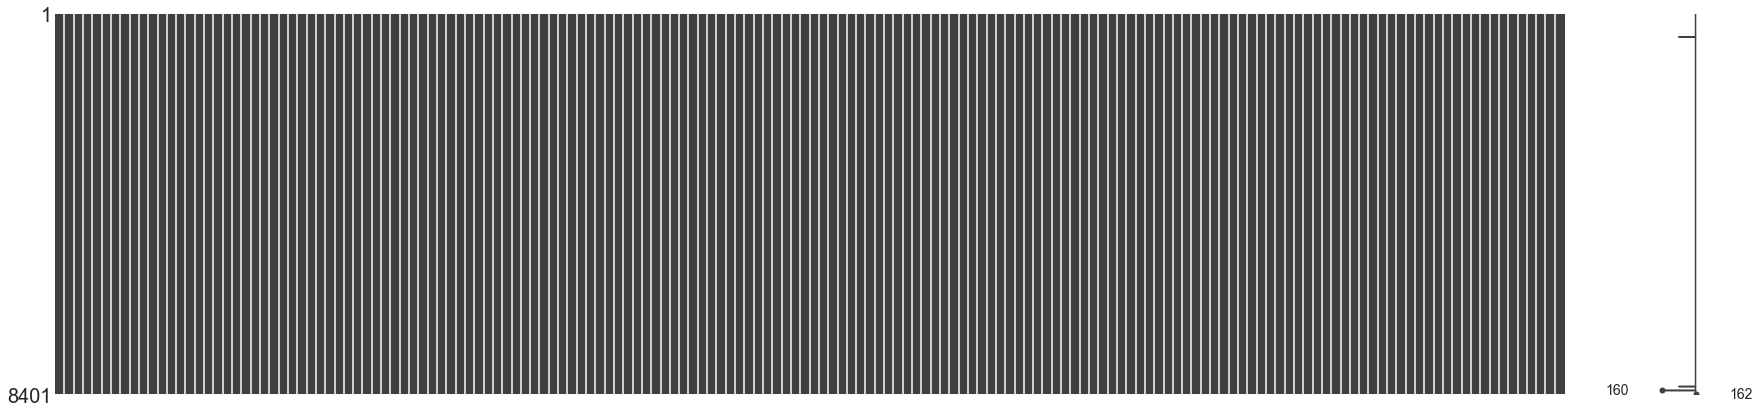

In [14]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_outfield_raw
msno.matrix(df_fbref_outfield_raw, figsize = (30, 7))

In [15]:
# Counts of missing values
outfield_null_value_stats = df_fbref_outfield_raw.isnull().sum(axis=0)
outfield_null_value_stats[outfield_null_value_stats != 0]

nationality_cleaned    2
position_cleaned       2
dtype: int64

The visualisation shows us very quickly that there are just a couple of missing values in the `nationality_cleaned` and `position_cleaned` columns, but otherwise the dataset is complete.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Assign Raw DataFrame to Engineered DataFrame</a>

In [16]:
df_fbref_outfield = df_fbref_outfield_raw

In [17]:
df_fbref_outfield.shape

(8401, 162)

### <a id='#section4.2'>4.2. Filter DataFrame for the Latest Complete Season - 19/20</a>

In [18]:
df_fbref_outfield_1920 = df_fbref_outfield[df_fbref_outfield['Season'] == '19/20']

In [19]:
df_fbref_outfield_1920.shape

(2732, 162)

### <a id='#section4.3'>4.3. Filter for Players that have Played 900 or More Minutes</a>
Filter for Players that have Played 10 or more games (900 minutes) and are outfielders, not goalkeepers (second step is unnecessary with out dataset as players and outfielders have already been seperated).

In [20]:
df_fbref_outfield_1920 = df_fbref_outfield_1920[df_fbref_outfield_1920['minutes'] >= 900]
df_fbref_outfield_1920 = df_fbref_outfield_1920[df_fbref_outfield_1920['position'] != 'GK']

In [21]:
df_fbref_outfield_1920.shape

(1792, 162)

### <a id='#section4.4'>4.4. Filter DataFrame for the Latest Complete Season - 19/20</a>

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df_fbref_outfield_1920 = df_fbref_outfield_1920.reset_index()

In [24]:
df_fbref_outfield_1920

,index,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,18,Yunis Abdelhamid,ma MAR,DF,Reims,31,1987,28.0,28.0,2520.0,3.0,0.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,1.3,1.3,0.1,0.05,0.00,0.05,0.05,0.05,28.0,19.0,5.0,0.0,26.3,0.68,0.18,0.16,0.60,0.07,1.7,1.7,1328.0,1515.0,87.7,29513.0,9041.0,9.0,23.0,39.1,851.0,924.0,92.1,468.0,568.0,82.4,-0.1,2.0,45.0,3.0,0.0,83.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,3.0,21.0,25.0,12.0,16.0,0.57,11.0,0.0,0.0,4.0,1.0,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,50.0,14.0,299.0,111.0,37.1,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,80.8,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,97.6,12.0,8.0,0.0,21.0,20.0,0.0,0.0,1.0,0.0,226.0,86.0,42.0,67.2,19/20,Reims,Ligue 1,France,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender
1,20,Mathieu Cafaro,fr FRA,"FW,MF",Reims,22,1997,13.0,12.0,924.0,1.0,2.0,1.0,1.0,3.0,1.0,0.10,0.19,0.29,0.00,0.19,2.8,2.1,1.8,0.28,0.18,0.46,0.20,0.38,10.3,38.0,14.0,6.0,36.8,3.70,1.36,0.00,0.00,0.06,-1.8,-2.1,203.0,351.0,57.8,4411.0,1643.0,2.0,18.0,11.1,137.0,173.0,79.2,64.0,160.0,40.0,0.2,15.0,26.0,10.0,4.0,51.0,292.0,59.0,15.0,0.0,57.0,36.0,94.0,38.0,12.0,20.0,4.0,153.0,65.0,133.0,30.0,300.0,9.0,6.0,2.0,1.0,18.0,11.0,17.0,32.0,3.12,13.0,10.0,4.0,1.0,4.0,3.0,0.29,0.0,2.0,0.0,0.0,1.0,0.0,17.0,9.0,9.0,5.0,3.0,5.0,19.0,26.3,14.0,232.0,41.0,17.7,56.0,116.0,60.0,10.0,0.0,0.0,10.0,3.0,0.0,0.0,495.0,3.0,61.0,206.0,270.0,32.0,435.0,23.0,41.0,56.1,26.0,4.0,327.0,2521.0,1417.0,431.0,327.0,75.9,25.0,13.0,1.0,17.0,21.0,1.0,1.0,0.0,0.0,66.0,6.0,13.0,31.6,19/20,Reims,Ligue 1,France,mathieu cafaro,mathieu,cafaro,m,FRA,France,Forward
2,21,Moreto Cassamã,gw GNB,MF,Reim

### <a id='#section4.5'>4.5. Standardisation of Metrics</a>

To standardise the 
* Possession Adjustment for all Defensive Metrics
* Per 90 metrics for all values that are not Percentages or existing per90 metrics

#### <a id='#section4.5.1'>4.5.1. Possession Adjustment (PAdj)</a>

Defensive metrics to standardise per possesion:
*    Number of Players Tackles - `tackles`;
*    Tackles Won - 'tackles_won' - `tackles_won`;
*    Tackles in Defensive 1/3 - `tackles_def_3rd`;
*    Tackles in the Middle 1/3 - `tackles_mid_3rd`;
*    Tackles in the Attacking 1/3 - `tackles_att_3rd`;
*    Number of Dribblers Tackled - `dribble_tackles`;
*    Dribbles Contested - `dribbles_vs`;
*    Number of Times Dribbled Past by an Opposing Player - `dribbled_past`;
*    Pressures - `pressures`;
*    Successful Pressures - `pressure_regains`;
*    Pressures Defensive 1/3 - `pressures_def_3rd`,
*    Pressures Middle 1/3 - `pressures_mid_3rd`,
*    Pressures Attacking 1/3 - `pressures_att_3rd`,
*    Blocks - `blocks`;
*    Blocked Shots - `blocked_shots`;
*    Blocked Shots on Target - `blocked_shots_saves`;
*    Blocked Passes - `blocked_passes`;
*    Interceptions - `interceptions`;
*    Clearances - `clearances`; and
*    Errors - `errors`

See FBref website for glossary of all event metric definitions.

##### Possession Adjustment

In [25]:
# Import data as a pandas DataFrame, df_fbref_outfield_raw

## Look for most recent CSV file
lst_files_fbref_team_latest = glob.glob(data_dir_fbref + '/engineered/team/*')    # * means all if need specific format then *.csv
filepath_fbref_team_latest = max(lst_files_fbref_team_latest, key=os.path.getctime)

## Load in most recently parsed CSV file
df_fbref_team_raw = pd.read_csv(filepath_fbref_team_latest)

In [26]:
df_fbref_team_1920 = df_fbref_team_raw[df_fbref_team_raw['Season'] == '19/20']

In [27]:
df_fbref_team_1920

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,league_name,league_country,Season
0,Arsenal,29.0,54.0,38.0,418.0,3420.0,56.0,35.0,3.0,3.0,88.0,5.0,1.47,0.92,2.39,1.39,2.32,49.1,46.8,30.2,1.29,0.79,2.08,1.23,2.02,38.0,38.0,3420.0,48.0,1.26,189.0,143.0,0.783,14.0,14.0,10.0,10.0,26.3,8.0,7.0,1.0,0.0,38.0,0.0,9.0,0.0,58.5,0.27,10.5,0.28,128.0,433.0,29.6,971.0,220.0,29.7,32.7,312.0,46.5,41.4,353.0,23.0,6.5,21.0,0.55,13.4,401.0,144.0,19.0,35.9,10.55,3.79,0.13,0.37,0.12,6.9,6.2,16349.0,19802.0,82.6,321171.0,94850.0,232.0,693.0,33.5,12092.0,13463.0,89.8,4025.0,5646.0,71.3,4.8,285.0,1120.0,320.0,70.0,1490.0,17930.0,1872.0,490.0,36.0,3508.0,528.0,694.0,231.0,66.0,75.0,36.0,13732.0,2777.0,3293.0,6362.0,11512.0,608.0,753.0,286.0,63.0,321.0,258.0,512.0,615.0,16.18,435.0,57.0,51.0,36.0,36.0,78.0,2.05,57.0,4.0,4.0,9.0,4.0,0.0,601.0,373.0,325.0,199.0,77.0,203.0,598.0,33.9,395.0,6127.0,1640.0,26.8,2242.0,2663.0,1222.0,614.0,153.0,2.0,461.0,334.0,978.0,14.0,24196.0,2926.0,8613.0,11497.0,5714.0,934.0,22390.0,429.0,712.0,60.3,456.0,35.0,16310.0,97524.0,55338.0,18851.0,16349.0,86.7,448.0,451.0,1.0,420.0,437.0,74.0,2.0,6.0,0.0,3085.0,499.0,573.0,46.5,Premier League,England,19/20
1,Aston Villa,28.0,43.9,38.0,418.0,3420.0,40.0,32.0,1.0,

In [28]:
# Select columns of interest - team name (squad) and possession
cols_team = ['squad', 'possession']

# Create more concise DataFrame using only columns of interest
df_fbref_team_1920_select = df_fbref_team_1920[cols_team]

In [29]:
df_fbref_team_1920_select = df_fbref_team_1920_select.rename(columns={'squad': 'team_name',
                                                                      'possession': 'avg_team_possesion'
                                                                     }
                                                            )

In [30]:
df_fbref_team_1920_select

,team_name,avg_team_possesion
0,Arsenal,54.0
1,Aston Villa,43.9
2,Bournemouth,43.8
3,Brighton,52.2
4,Burnley,41.4
...,...,...
93,Real Sociedad,56.6
94,Sevilla,58.4
95,Valencia,48.9
96,Valladolid,44.3


In [31]:
# Join the Team possession DataFrame to the Outfield Players DataFrame
df_fbref_outfield_1920 = pd.merge(df_fbref_outfield_1920, df_fbref_team_1920_select, left_on='team_name', right_on='team_name')

In [32]:
df_fbref_outfield_1920_poss = df_fbref_outfield_1920

In [33]:
df_fbref_outfield_1920_poss

,index,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned,avg_team_possesion
0,18,Yunis Abdelhamid,ma MAR,DF,Reims,31,1987,28.0,28.0,2520.0,3.0,0.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,1.3,1.3,0.1,0.05,0.00,0.05,0.05,0.05,28.0,19.0,5.0,0.0,26.3,0.68,0.18,0.16,0.60,0.07,1.7,1.7,1328.0,1515.0,87.7,29513.0,9041.0,9.0,23.0,39.1,851.0,924.0,92.1,468.0,568.0,82.4,-0.1,2.0,45.0,3.0,0.0,83.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,3.0,21.0,25.0,12.0,16.0,0.57,11.0,0.0,0.0,4.0,1.0,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,50.0,14.0,299.0,111.0,37.1,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,80.8,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,97.6,12.0,8.0,0.0,21.0,20.0,0.0,0.0,1.0,0.0,226.0,86.0,42.0,67.2,19/20,Reims,Ligue 1,France,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender,48.8
1,20,Mathieu Cafaro,fr FRA,"FW,MF",Reims,22,1997,13.0,12.0,924.0,1.0,2.0,1.0,1.0,3.0,1.0,0.10,0.19,0.29,0.00,0.19,2.8,2.1,1.8,0.28,0.18,0.46,0.20,0.38,10.3,38.0,14.0,6.0,36.8,3.70,1.36,0.00,0.00,0.06,-1.8,-2.1,203.0,351.0,57.8,4411.0,1643.0,2.0,18.0,11.1,137.0,173.0,79.2,64.0,160.0,40.0,0.2,15.0,26.0,10.0,4.0,51.0,292.0,59.0,15.0,0.0,57.0,36.0,94.0,38.0,12.0,20.0,4.0,153.0,65.0,133.0,30.0,300.0,9.0,6.0,2.0,1.0,18.0,11.0,17.0,32.0,3.12,13.0,10.0,4.0,1.0,4.0,3.0,0.29,0.0,2.0,0.0,0.0,1.0,0.0,17.0,9.0,9.0,5.0,3.0,5.0,19.0,26.3,14.0,232.0,41.0,17.7,56.0,116.0,60.0,10.0,0.0,0.0,10.0,3.0,0.0,0.0,495.0,3.0,61.0,206.0,270.0,32.0,435.0,23.0,41.0,56.1,26.0,4.0,327.0,2521.0,1417.0,431.0,327.0,75.9,25.0,13.0,1.0,17.0,21.0,1.0,1.0,0.0,0.0,66.0,6.0,13.0,31.6,19/20,Reims,Ligue 1,France,mathieu cafaro,mathieu,cafaro,m,FRA,France,Forward,48.8
2,21,

In [34]:
# Drop 'percentage' columns that are not applicable for standardisation
df_fbref_outfield_1920_poss = df_fbref_outfield_1920_poss.drop(df_fbref_outfield_1920_poss.filter(regex='_pct').columns, axis=1)

In [35]:
lst_cols_def = ['avg_team_possesion',
                'tackles',
                'tackles_won',
                'tackles_def_3rd',
                'tackles_mid_3rd',
                'tackles_att_3rd',
                'dribble_tackles',
                'dribbles_vs',
                'dribbled_past',
                'pressures',
                'pressure_regains',
                'pressures_def_3rd',
                'pressures_mid_3rd',
                'pressures_att_3rd',
                'blocks',
                'blocked_shots',
                'blocked_shots_saves',
                'blocked_passes',
                'interceptions',
                'clearances',
                'errors'
               ]

In [36]:
df_fbref_outfield_1920_poss = df_fbref_outfield_1920_poss[lst_cols_def]

In [37]:
df_fbref_outfield_1920_poss

,avg_team_possesion,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribbled_past,pressures,pressure_regains,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors
0,48.8,61.0,37.0,43.0,16.0,2.0,14.0,28.0,14.0,299.0,111.0,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0
1,48.8,17.0,9.0,9.0,5.0,3.0,5.0,19.0,14.0,232.0,41.0,56.0,116.0,60.0,10.0,0.0,0.0,10.0,3.0,0.0,0.0
2,48.8,21.0,15.0,6.0,11.0,4.0,7.0,14.0,7.0,63.0,26.0,15.0,32.0,16.0,7.0,2.0,0.0,5.0,4.0,6.0,0.0
3,48.8,76.0,52.0,29.0,39.0,8.0,24.0,62.0,38.0,505.0,150.0,164.0,261.0,80.0,39.0,6.0,0.0,33.0,36.0,41.0,0.0
4,48.8,21.0,13.0,12.0,5.0,4.0,2.0,16.0,14.0,319.0,92.0,44.0,143.0,132.0,16.0,2.0,0.0,14.0,7.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,48.9,16.0,9.0,11.0,3.0,2.0,9.0,23.0,14.0,117.0,41.0,89.0,23.0,5.0,49.0,30.0,0.0,19.0,52.0,218.0,4.0
1788,48.9,11.0,7.0,4.0,5.0,2.0,1.0,18.0,17.0,327.0,94.0,54.0,160.0,113.0,14.0,2.0,0.0,12.0,10.0,16.0,0.0
1789,48.9,28.0,17.0,9.0,16.0,3.0,10.0,40.0,30.0,432.0,112.0,131.0,198.0,103.0,30.0,5.0,0.0,25.0,12.0,17.0,0.0
1790,48.9,20.0,15.0,8.0,11.0,1.0,4.0,27.0,23.0,462.0,95.0,132.0,236.0,94.0,40.0,4.0,0.0,36.0,14.0,14.0,0.0


In [38]:
# Divide all remaining columns by the minutes played - minutes
df_fbref_outfield_1920_poss = df_fbref_outfield_1920_poss.iloc[:, ].apply(lambda s: s / df_fbref_outfield_1920_poss.iloc[:, 0])

In [39]:
df_fbref_outfield_1920_poss

,avg_team_possesion,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribbled_past,pressures,pressure_regains,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors
0,1.0,1.250000,0.758197,0.881148,0.327869,0.040984,0.286885,0.573770,0.286885,6.127049,2.274590,3.872951,1.987705,0.266393,0.881148,0.389344,0.0,0.491803,1.004098,3.401639,0.020492
1,1.0,0.348361,0.184426,0.184426,0.102459,0.061475,0.102459,0.389344,0.286885,4.754098,0.840164,1.147541,2.377049,1.229508,0.204918,0.000000,0.0,0.204918,0.061475,0.000000,0.000000
2,1.0,0.430328,0.307377,0.122951,0.225410,0.081967,0.143443,0.286885,0.143443,1.290984,0.532787,0.307377,0.655738,0.327869,0.143443,0.040984,0.0,0.102459,0.081967,0.122951,0.000000
3,1.0,1.557377,1.065574,0.594262,0.799180,0.163934,0.491803,1.270492,0.778689,10.348361,3.073770,3.360656,5.348361,1.639344,0.799180,0.122951,0.0,0.676230,0.737705,0.840164,0.000000
4,1.0,0.430328,0.266393,0.245902,0.102459,0.081967,0.040984,0.327869,0.286885,6.536885,1.885246,0.901639,2.930328,2.704918,0.327869,0.040984,0.0,0.286885,0.143443,0.409836,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1.0,0.327198,0.184049,0.224949,0.061350,0.040900,0.184049,0.470348,0.286299,2.392638,0.838446,1.820041,0.470348,0.102249,1.002045,0.613497,0.0,0.388548,1.063395,4.458078,0.081800
1788,1.0,0.224949,0.143149,0.081800,0.102249,0.040900,0.020450,0.368098,0.347648,6.687117,1.922290,1.104294,3.271984,2.310838,0.286299,0.040900,0.0,0.245399,0.204499,0.327198,0.000000
1789,1.0,0.572597,0.347648,0.184049,0.327198,0.061350,0.204499,0.817996,0.613497,8.834356,2.290389,2.678937,4.049080,2.106339,0.613497,0.102249,0.0,0.511247,0.245399,0.347648,0.000000
1790,1.0,0.408998,0.306748,0.163599,0.224949,0.020450,0.081800,0.552147,0.470348,9.447853,1.942740,2.699387,4.826176,1.922290,0.817996,0.081800,0.0,0.736196,0.286299,0.286299,0.000000


In [40]:
# Drop Average Team Possession played column (value is now incorrect but was used when dividing all values by minutes)
df_fbref_outfield_1920_poss = df_fbref_outfield_1920_poss.drop('avg_team_possesion', axis=1)

In [41]:
# Add suffix to all columns names - _PAdj
df_fbref_outfield_1920_poss = df_fbref_outfield_1920_poss.add_suffix('_PAdj')

In [42]:
df_fbref_outfield_1920_poss

,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj
0,1.250000,0.758197,0.881148,0.327869,0.040984,0.286885,0.573770,0.286885,6.127049,2.274590,3.872951,1.987705,0.266393,0.881148,0.389344,0.0,0.491803,1.004098,3.401639,0.020492
1,0.348361,0.184426,0.184426,0.102459,0.061475,0.102459,0.389344,0.286885,4.754098,0.840164,1.147541,2.377049,1.229508,0.204918,0.000000,0.0,0.204918,0.061475,0.000000,0.000000
2,0.430328,0.307377,0.122951,0.225410,0.081967,0.143443,0.286885,0.143443,1.290984,0.532787,0.307377,0.655738,0.327869,0.143443,0.040984,0.0,0.102459,0.081967,0.122951,0.000000
3,1.557377,1.065574,0.594262,0.799180,0.163934,0.491803,1.270492,0.778689,10.348361,3.073770,3.360656,5.348361,1.639344,0.799180,0.122951,0.0,0.676230,0.737705,0.840164,0.000000
4,0.430328,0.266393,0.245902,0.102459,0.081967,0.040984,0.327869,0.286885,6.536885,1.885246,0.901639,2.930328,2.704918,0.327869,0.040984,0.0,0.286885,0.143443,0.409836,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.327198,0.184049,0.224949,0.061350,0.040900,0.184049,0.470348,0.286299,2.392638,0.838446,1.820041,0.470348,0.102249,1.002045,0.613497,0.0,0.388548,1.063395,4.458078,0.081800
1788,0.224949,0.143149,0.081800,0.102249,0.040900,0.020450,0.368098,0.347648,6.687117,1.922290,1.104294,3.271984,2.310838,0.286299,0.040900,0.0,0.245399,0.204499,0.327198,0.000000
1789,0.572597,0.347648,0.184049,0.327198,0.061350,0.204499,0.817996,0.613497,8.834356,2.290389,2.678937,4.049080,2.106339,0.613497,0.102249,0.0,0.511247,0.245399,0.347648,0.000000
1790,0.408998,0.306748,0.163599,0.224949,0.020450,0.081800,0.552147,0.470348,9.447853,1.942740,2.699387,4.826176,1.922290,0.817996,0.081800,0.0,0.736196,0.286299,0.286299,0.000000


In [43]:
# Join the newly created 'Per 90' DataFrame to the original DataFrame by index
df_fbref_outfield_1920 = pd.merge(df_fbref_outfield_1920, df_fbref_outfield_1920_poss, left_index=True, right_index=True)

In [44]:
df_fbref_outfield_1920

,index,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned,avg_team_possesion,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj
0,18,Yunis Abdelhamid,ma MAR,DF,Reims,31,1987,28.0,28.0,2520.0,3.0,0.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,1.3,1.3,0.1,0.05,0.00,0.05,0.05,0.05,28.0,19.0,5.0,0.0,26.3,0.68,0.18,0.16,0.60,0.07,1.7,1.7,1328.0,1515.0,87.7,29513.0,9041.0,9.0,23.0,39.1,851.0,924.0,92.1,468.0,568.0,82.4,-0.1,2.0,45.0,3.0,0.0,83.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,3.0,21.0,25.0,12.0,16.0,0.57,11.0,0.0,0.0,4.0,1.0,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,50.0,14.0,299.0,111.0,37.1,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,80.8,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,97.6,12.0,8.0,0.0,21.0,20.0,0.0,0.0,1.0,0.0,226.0,86.0,42.0,67.2,19/20,Reims,Ligue 1,France,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender,48.8,1.250000,0.758197,0.881148,0.327869,0.040984,0.286885,0.573770,0.286885,6.127049,2.274590,3.872951,1.987705,0.266393,0.881148,0.389344,0.0,0.491803,1.004098,3.401639,0.020492
1,20,Mathieu Cafaro,fr FRA,"FW,MF",Reims,22,1997,13.0,12.0,924.0,1.0,2.0,1.0,1.0,3.0,1.0,0.10,0.19,0.29,0.00,0.19,2.8,2.1,1.8,0.28,0.18,0.46,0.20,0.38,10.3,38.0,14.0,6.0,36.8,3.70,1.36,0.00,0.00,0.06,-1.8,-2.1,203.0,351.0,57.8,4411.0,1643.0,2.0,18.0,11.1,137.0,173.0,79.2,64.0,160.0,40.0,

#### <a id='#section4.5.2'>4.5.2. Creation of Per 90 Metrics</a>

##### Assign DataFrame to a Per 90 DataFrame

In [45]:
# Assign the FBref Outfield DataFrame to a Per 90 eqivalent DataFrame - this is the new DataFrame where metrics are standardised
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920

##### ...

In [46]:
# Drop 'percentage' and 'per90' columns that are not applicable for standardisation

## Drop Percetnage columns
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.drop(df_fbref_outfield_1920_Per90.filter(regex='_pct').columns, axis=1)

## Drop Per 90 columns
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.drop(df_fbref_outfield_1920_Per90.filter(regex='_per90').columns, axis=1)

##### ...

In [47]:
## Select only columns that are floats - do not require string or integer columns
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.select_dtypes(include=[np.float])

##### ...

In [48]:
df_fbref_outfield_1920_Per90

,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,xg,npxg,xa,minutes_90s,shots_total,shots_on_target,shots_free_kicks,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribbled_past,pressures,pressure_regains,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,avg_team_possesion,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj
0,28.0,28.0,2520.0,3.0,0.0,0.0,0.0,0.0,0.0,1.3,1.3,0.1,28.0,19.0,5.0,0.0,0.16,0.60,0.07,1.7,1.7,1328.0,1515.0,29513.0,9041.0,9.0,23.0,851.0,924.0,468.0,568.0,-0.1,2.0,45.0,3.0,0.0,83.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,3.0,21.0,25.0,12.0,16.0,11.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,14.0,299.0,111.0,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,12.0,8.0,0.0,21.0,20.0,0.0,0.0,1.0,0.0,226.0,86.0,42.0,48.8,1.250000,0.758197,0.881148,0.327869,0.040984,0.286885,0.573770,0.286885,6.127049,2.274590,3.872951,1.987705,0.266393,0.881148,0.389344,0.0,0.491803,1.004098,3.401639,0.020492
1,13.0,12.0,924.0,1.0,2.0,1.0,1.0,3.0,1.0,2.8,2.1,1.8,10.3,38.0,14.0,6.0,0.00,0.00,0.06,-1.8,-2.1,203.0,351.0,4411.0,1643.0,2.0,18.0,137.0,173.0,64.0,160.0,0.2,15.0,26.0,10.0,4.0,51.0,292.0,59.0,15.0,0.0,57.0,36.0,94.0,38.0,12.0,20.0,4.0,153.0,65.0,133.0,30.0,300.0,9.0,6.0,2.0,1.0,18.0,11.0,17.0,32.0,13.0,10.0,4.0,1.0,4.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,17.0,9.0,9.0,5.0,3.0,5.0,19.0,14.0,232.0,41.0,56.0,116.0,60.0,10.0,0.0,0.0,10.0,3.0,0.0,0.0,495.0,3.0,61.0,206.0,270.0,32.0,435.0,23.0,41.0,26.0,4.0,327.0,2521.0,1417.0,431.0,327.0,25.0,13.0,1.0,17.0,21.0,1.0,1.0,0.0,0.0,66.0,6.0,13.0,48.8,0.348361,0.184426,0.184426,0.102459,0.061475,0.102459,0.389344,0.286885,4.754098,0.840164,1.147541,2.377049,1.229508,0.204918,0.000000,0.0,0.204918,0.061475,0.000000,0.000000
2,7.0,7.0,592.0,0.0,1.0,0.0,0.0,3.0,0.0,0.1,0.1,0.4,6.6,3.0,0.0,0.0,0.00,0.00,0.03,-0.1,-0.1,445.0,507.0,10195.0,2304.0,4.0,10.0,278.0,303.0,163.0,194.0,0.6,9.0,34.0,3.0,0.0,46.0,472.0,35.0,23.0,0.0,72.0,35.0,18.0,12.0,2.0,8.0,2.0,366.0,73.0,68.0,32.0,461.0,8.0,0.0,3.0,4.0,9.0,5.0,6.0,14.0,6.0,7.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0,15.0,6.0,11.0,4.0,7.0,14.

In [49]:
# 

## Select columns to drop
cols_drop = ['games', 'games_starts', 'minutes']
             
##
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.drop(cols_drop, axis=1)

##### ...

In [50]:
df_fbref_outfield_1920_Per90.head()

,goals,assists,pens_made,pens_att,cards_yellow,cards_red,xg,npxg,xa,minutes_90s,shots_total,shots_on_target,shots_free_kicks,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribbled_past,pressures,pressure_regains,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,avg_team_possesion,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj
0,3.0,0.0,0.0,0.0,0.0,0.0,1.3,1.3,0.1,28.0,19.0,5.0,0.0,0.16,0.60,0.07,1.7,1.7,1328.0,1515.0,29513.0,9041.0,9.0,23.0,851.0,924.0,468.0,568.0,-0.1,2.0,45.0,3.0,0.0,83.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,3.0,21.0,25.0,12.0,16.0,11.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,14.0,299.0,111.0,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,12.0,8.0,0.0,21.0,20.0,0.0,0.0,1.0,0.0,226.0,86.0,42.0,48.8,1.250000,0.758197,0.881148,0.327869,0.040984,0.286885,0.573770,0.286885,6.127049,2.274590,3.872951,1.987705,0.266393,0.881148,0.389344,0.0,0.491803,1.004098,3.401639,0.020492
1,1.0,2.0,1.0,1.0,3.0,1.0,2.8,2.1,1.8,10.3,38.0,14.0,6.0,0.00,0.00,0.06,-1.8,-2.1,203.0,351.0,4411.0,1643.0,2.0,18.0,137.0,173.0,64.0,160.0,0.2,15.0,26.0,10.0,4.0,51.0,292.0,59.0,15.0,0.0,57.0,36.0,94.0,38.0,12.0,20.0,4.0,153.0,65.0,133.0,30.0,300.0,9.0,6.0,2.0,1.0,18.0,11.0,17.0,32.0,13.0,10.0,4.0,1.0,4.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,17.0,9.0,9.0,5.0,3.0,5.0,19.0,14.0,232.0,41.0,56.0,116.0,60.0,10.0,0.0,0.0,10.0,3.0,0.0,0.0,495.0,3.0,61.0,206.0,270.0,32.0,435.0,23.0,41.0,26.0,4.0,327.0,2521.0,1417.0,431.0,327.0,25.0,13.0,1.0,17.0,21.0,1.0,1.0,0.0,0.0,66.0,6.0,13.0,48.8,0.348361,0.184426,0.184426,0.102459,0.061475,0.102459,0.389344,0.286885,4.754098,0.840164,1.147541,2.377049,1.229508,0.204918,0.000000,0.0,0.204918,0.061475,0.000000,0.000000
2,0.0,1.0,0.0,0.0,3.0,0.0,0.1,0.1,0.4,6.6,3.0,0.0,0.0,0.00,0.00,0.03,-0.1,-0.1,445.0,507.0,10195.0,2304.0,4.0,10.0,278.0,303.0,163.0,194.0,0.6,9.0,34.0,3.0,0.0,46.0,472.0,35.0,23.0,0.0,72.0,35.0,18.0,12.0,2.0,8.0,2.0,366.0,73.0,68.0,32.0,461.0,8.0,0.0,3.0,4.0,9.0,5.0,6.0,14.0,6.0,7.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0,15.0,6.0,11.0,4.0,7.0,14.0,7.0,63.0,26.0,15.0,32.0,16.0,7.0,2.0,0.0,5.0,4.0,6.0,0.0,570.0,16.0,164.

##### Move the `minutes_90s` column to the first position

In [51]:
col_name = 'minutes_90s'
first_col = df_fbref_outfield_1920_Per90.pop(col_name)

In [52]:
df_fbref_outfield_1920_Per90.insert(0, col_name, first_col)

In [53]:
df_fbref_outfield_1920_Per90.head()

,minutes_90s,goals,assists,pens_made,pens_att,cards_yellow,cards_red,xg,npxg,xa,shots_total,shots_on_target,shots_free_kicks,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribbled_past,pressures,pressure_regains,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,avg_team_possesion,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj
0,28.0,3.0,0.0,0.0,0.0,0.0,0.0,1.3,1.3,0.1,19.0,5.0,0.0,0.16,0.60,0.07,1.7,1.7,1328.0,1515.0,29513.0,9041.0,9.0,23.0,851.0,924.0,468.0,568.0,-0.1,2.0,45.0,3.0,0.0,83.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,3.0,21.0,25.0,12.0,16.0,11.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,14.0,299.0,111.0,189.0,97.0,13.0,43.0,19.0,0.0,24.0,49.0,166.0,1.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,12.0,8.0,0.0,21.0,20.0,0.0,0.0,1.0,0.0,226.0,86.0,42.0,48.8,1.250000,0.758197,0.881148,0.327869,0.040984,0.286885,0.573770,0.286885,6.127049,2.274590,3.872951,1.987705,0.266393,0.881148,0.389344,0.0,0.491803,1.004098,3.401639,0.020492
1,10.3,1.0,2.0,1.0,1.0,3.0,1.0,2.8,2.1,1.8,38.0,14.0,6.0,0.00,0.00,0.06,-1.8,-2.1,203.0,351.0,4411.0,1643.0,2.0,18.0,137.0,173.0,64.0,160.0,0.2,15.0,26.0,10.0,4.0,51.0,292.0,59.0,15.0,0.0,57.0,36.0,94.0,38.0,12.0,20.0,4.0,153.0,65.0,133.0,30.0,300.0,9.0,6.0,2.0,1.0,18.0,11.0,17.0,32.0,13.0,10.0,4.0,1.0,4.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,17.0,9.0,9.0,5.0,3.0,5.0,19.0,14.0,232.0,41.0,56.0,116.0,60.0,10.0,0.0,0.0,10.0,3.0,0.0,0.0,495.0,3.0,61.0,206.0,270.0,32.0,435.0,23.0,41.0,26.0,4.0,327.0,2521.0,1417.0,431.0,327.0,25.0,13.0,1.0,17.0,21.0,1.0,1.0,0.0,0.0,66.0,6.0,13.0,48.8,0.348361,0.184426,0.184426,0.102459,0.061475,0.102459,0.389344,0.286885,4.754098,0.840164,1.147541,2.377049,1.229508,0.204918,0.000000,0.0,0.204918,0.061475,0.000000,0.000000
2,6.6,0.0,1.0,0.0,0.0,3.0,0.0,0.1,0.1,0.4,3.0,0.0,0.0,0.00,0.00,0.03,-0.1,-0.1,445.0,507.0,10195.0,2304.0,4.0,10.0,278.0,303.0,163.0,194.0,0.6,9.0,34.0,3.0,0.0,46.0,472.0,35.0,23.0,0.0,72.0,35.0,18.0,12.0,2.0,8.0,2.0,366.0,73.0,68.0,32.0,461.0,8.0,0.0,3.0,4.0,9.0,5.0,6.0,14.0,6.0,7.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0,15.0,6.0,11.0,4.0,7.0,14.0,7.0,63.0,26.0,15.0,32.0,16.0,7.0,2.0,0.0,5.0,4.0,6.0,0.0,570.0,16.0,164.

In [54]:
# Divide all remaining columns by the minutes played - minutes
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.iloc[:, ].apply(lambda s: s / df_fbref_outfield_1920_Per90.iloc[:, 0])

In [55]:
df_fbref_outfield_1920_Per90

,minutes_90s,goals,assists,pens_made,pens_att,cards_yellow,cards_red,xg,npxg,xa,shots_total,shots_on_target,shots_free_kicks,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribbled_past,pressures,pressure_regains,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,avg_team_possesion,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj
0,1.0,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.046429,0.046429,0.003571,0.678571,0.178571,0.000000,0.005714,0.021429,0.002500,0.060714,0.060714,47.428571,54.107143,1054.035714,322.892857,0.321429,0.821429,30.392857,33.000000,16.714286,20.285714,-0.003571,0.071429,1.607143,0.107143,0.000000,2.964286,51.321429,2.785714,2.678571,0.035714,6.571429,1.750000,0.035714,0.000000,0.000000,0.000000,0.000000,40.785714,5.035714,8.285714,36.000000,14.678571,2.357143,0.107143,0.107143,0.107143,0.750000,0.892857,0.428571,0.571429,0.392857,0.000000,0.000000,0.142857,0.035714,0.035714,0.035714,0.000000,0.000000,0.0,0.000000,0.000000,2.178571,1.321429,1.535714,0.571429,0.071429,0.500000,1.000000,0.500000,10.678571,3.964286,6.750000,3.464286,0.464286,1.535714,0.678571,0.0,0.857143,1.750000,5.928571,0.035714,66.285714,9.142857,40.392857,28.607143,2.178571,0.964286,63.642857,0.750000,0.928571,0.750000,0.000000,42.892857,274.035714,153.785714,45.214286,44.142857,0.428571,0.285714,0.000000,0.750000,0.714286,0.000000,0.000000,0.035714,0.0,8.071429,3.071429,1.500000,1.742857,0.044643,0.027078,0.031470,0.011710,0.001464,0.010246,0.020492,0.010246,0.218823,0.081235,0.138320,0.070989,0.009514,0.031470,0.013905,0.0,0.017564,0.035861,0.121487,0.000732
1,1.0,0.097087,0.194175,0.097087,0.097087,0.291262,0.097087,0.271845,0.203883,0.174757,3.689320,1.359223,0.582524,0.000000,0.000000,0.005825,-0.174757,-0.203883,19.708738,34.077670,428.252427,159.514563,0.194175,1.747573,13.300971,16.796117,6.213592,15.533981,0.019417,1.456311,2.524272,0.970874,0.388350,4.951456,28.349515,5.728155,1.456311,0.000000,5.533981,3.495146,9.126214,3.689320,1.165049,1.941748,0.388350,14.854369,6.310680,12.912621,2.912621,29.126214,0.873786,0.582524,0.194175,0.097087,1.747573,1.067961,1.650485,3.106796,1.262136,0.970874,0.388350,0.097087,0.388350,0.291262,0.000000,0.194175,0.000000,0.0,0.097087,0.000000,1.650485,0.873786,0.873786,0.485437,0.291262,0.485437,1.84

##### ...

In [56]:
# Drop minutes played column (value is now incorrect but was used when dividing all values by minutes)
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.drop('minutes_90s', axis=1)

##### ...

In [57]:
# Add suffix to all columns names - _Per90
df_fbref_outfield_1920_Per90 = df_fbref_outfield_1920_Per90.add_suffix('_Per90')

In [58]:
df_fbref_outfield_1920_Per90

,goals_Per90,assists_Per90,pens_made_Per90,pens_att_Per90,cards_yellow_Per90,cards_red_Per90,xg_Per90,npxg_Per90,xa_Per90,shots_total_Per90,shots_on_target_Per90,shots_free_kicks_Per90,goals_per_shot_Per90,goals_per_shot_on_target_Per90,npxg_per_shot_Per90,xg_net_Per90,npxg_net_Per90,passes_completed_Per90,passes_Per90,passes_total_distance_Per90,passes_progressive_distance_Per90,passes_completed_short_Per90,passes_short_Per90,passes_completed_medium_Per90,passes_medium_Per90,passes_completed_long_Per90,passes_long_Per90,xa_net_Per90,assisted_shots_Per90,passes_into_final_third_Per90,passes_into_penalty_area_Per90,crosses_into_penalty_area_Per90,progressive_passes_Per90,passes_live_Per90,passes_dead_Per90,passes_free_kicks_Per90,through_balls_Per90,passes_pressure_Per90,passes_switches_Per90,crosses_Per90,corner_kicks_Per90,corner_kicks_in_Per90,corner_kicks_out_Per90,corner_kicks_straight_Per90,passes_ground_Per90,passes_low_Per90,passes_high_Per90,passes_left_foot_Per90,passes_right_foot_Per90,passes_head_Per90,throw_ins_Per90,passes_other_body_Per90,passes_offsides_Per90,passes_oob_Per90,passes_intercepted_Per90,passes_blocked_Per90,sca_Per90,sca_passes_live_Per90,sca_passes_dead_Per90,sca_dribbles_Per90,sca_shots_Per90,sca_fouled_Per90,gca_Per90,gca_passes_live_Per90,gca_passes_dead_Per90,gca_dribbles_Per90,gca_shots_Per90,gca_fouled_Per90,gca_og_for_Per90,tackles_Per90,tackles_won_Per90,tackles_def_3rd_Per90,tackles_mid_3rd_Per90,tackles_att_3rd_Per90,dribble_tackles_Per90,dribbles_vs_Per90,dribbled_past_Per90,pressures_Per90,pressure_regains_Per90,pressures_def_3rd_Per90,pressures_mid_3rd_Per90,pressures_att_3rd_Per90,blocks_Per90,blocked_shots_Per90,blocked_shots_saves_Per90,blocked_passes_Per90,interceptions_Per90,clearances_Per90,errors_Per90,touches_Per90,touches_def_pen_area_Per90,touches_def_3rd_Per90,touches_mid_3rd_Per90,touches_att_3rd_Per90,touches_att_pen_area_Per90,touches_live_ball_Per90,dribbles_completed_Per90,dribbles_Per90,players_dribbled_past_Per90,nutmegs_Per90,carries_Per90,carry_distance_Per90,carry_progressive_distance_Per90,pass_targets_Per90,passes_received_Per90,miscontrols_Per90,dispossessed_Per90,cards_yellow_red_Per90,fouls_Per90,fouled_Per90,offsides_Per90,pens_won_Per90,pens_conceded_Per90,own_goals_Per90,ball_recoveries_Per90,aerials_won_Per90,aerials_lost_Per90,avg_team_possesion_Per90,tackles_PAdj_Per90,tackles_won_PAdj_Per90,tackles_def_3rd_PAdj_Per90,tackles_mid_3rd_PAdj_Per90,tackles_att_3rd_PAdj_Per90,dribble_tackles_PAdj_Per90,dribbles_vs_PAdj_Per90,dribbled_past_PAdj_Per90,pressures_PAdj_Per90,pressure_regains_PAdj_Per90,pressures_def_3rd_PAdj_Per90,pressures_mid_3rd_PAdj_Per90,pressures_att_3rd_PAdj_Per90,blocks_PAdj_Per90,blocked_shots_PAdj_Per90,blocked_shots_saves_PAdj_Per90,blocked_passes_PAdj_Per90,interceptions_PAdj_Per90,clearances_PAdj_Per90,errors_PAdj_Per90
0,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.046429,0.046429,0.003571,0.678571,0.178571,0.000000,0.005714,0.021429,0.002500,0.060714,0.060714,47.428571,54.107143,1054.035714,322.892857,0.321429,0.821429,30.392857,33.000000,16.714286,20.285714,-0.003571,0.071429,1.607143,0.107143,0.000000,2.964286,51.321429,2.785714,2.678571,0.035714,6.571429,1.750000,0.035714,0.000000,0.000000,0.000000,0.000000,40.785714,5.035714,8.285714,36.000000,14.678571,2.357143,0.107143,0.107143,0.107143,0.750000,0.892857,0.428571,0.571429,0.392857,0.000000,0.000000,0.142857,0.035714,0.035714,0.035714,0.000000,0.000000,0.0,0.000000,0.000000,2.178571,1.321429,1.535714,0.571429,0.071429,0.500000,1.000000,0.500000,10.678571,3.964286,6.750000,3.464286,0.464286,1.535714,0.678571,0.0,0.857143,1.750000,5.928571,0.035714,66.285714,9.142857,40.392857,28.607143,2.178571,0.964286,63.642857,0.750000,0.928571,0.750000,0.000000,42.892857,274.035714,153.785714,45.214286,44.142857,0.428571,0.285714,0.000000,0.750000,0.714286,0.000000,0.000000,0.035714,0.0,8.071429,3.071429,1.500000,1.742857,0.044643,0.027078,0.031470,0.011710,0.001464,0.010246,0.02

##### ...

In [59]:
# Join the newly created 'Per 90' DataFrame to the original DataFrame by index
df_fbref_outfield_1920 = pd.merge(df_fbref_outfield_1920, df_fbref_outfield_1920_Per90, left_index=True, right_index=True)

In [60]:
df_fbref_outfield_1920

,index,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned,avg_team_possesion,tackles_PAdj,tackles_won_PAdj,tackles_def_3rd_PAdj,tackles_mid_3rd_PAdj,tackles_att_3rd_PAdj,dribble_tackles_PAdj,dribbles_vs_PAdj,dribbled_past_PAdj,pressures_PAdj,pressure_regains_PAdj,pressures_def_3rd_PAdj,pressures_mid_3rd_PAdj,pressures_att_3rd_PAdj,blocks_PAdj,blocked_shots_PAdj,blocked_shots_saves_PAdj,blocked_passes_PAdj,interceptions_PAdj,clearances_PAdj,errors_PAdj,goals_Per90,assists_Per90,pens_made_Per90,pens_att_Per90,cards_yellow_Per90,cards_red_Per90,xg_Per90,npxg_Per90,xa_Per90,shots_total_Per90,shots_on_target_Per90,shots_free_kicks_Per90,goals_per_shot_Per90,goals_per_shot_on_target_Per90,npxg_per_shot_Per90,xg_net_Per90,npxg_net_Per90,passes_completed_Per90,passes_Per90,passes_total_distance_Per90,passes_progressive_distance_Per90,passes_completed_short_Per90,passes_short_Per90,passes_completed_medium_Per90,passes_medium_Per90,passes_completed_long_Per90,passes_long_Per90,xa_net_Per90,assisted_shots_Per90,passes_into_final_third_Per90,passes_into_penalty_area_Per90,crosses_into_penalty_area_Per90,progressive_passes_Per90,passes_live_Per90,passes_dead_Per90,passes_free_kicks_Per90,through_balls_Per90,passes_pressure_Per90,passes_switches_Per90,crosses_Per90,corner_kicks_Per90,corner_kicks_in_Per90,corner_kicks_out_Per90,corner_kicks_straight_Per90,passes_ground_Per90,passes_low_Per90,passes_high_Per90,passes_left_foot_Per90,passes_right_foot_Per90,passes_head_Per90,throw_ins_Per90,passes_other_body_Per90,passes_offsides_Per90,passes_oob_Per90,passes_intercepted_Per90,passes_blocked_Per90,sca_Per90,sca_passes_live_Per90,sca_passes_dead_Per90,sca_dribbles_Per90,sca_shots_Per90,sca_fouled_Per90,gca_Per90,gca_passes_live_Per90,gca_passes_dead_Per90,gca_dribble

### <a id='#section4.4'>4.4. Select Columns of Interest</a>
Selected the same metrics as per https://careyanalytics.wordpress.com/2020/04/30/a-closer-look-into-european-midfielder-playing-styles/

-    Short Passes Attempted - `passes_short_Per90`;
-    Medium Passes Attempted - `passes_medium_Per90`;
-    Long Passes Attempted - `passes_long_Per90`;
-    Passes Received - `passes_received_Per90`;
-    Touches - `touches_Per90`;
-    Passes into Final Third - `passes_into_final_third_Per90`;
-    Tackles in Defensive Third - `tackles_def_3rd_PAdj_Per90`;
-    Tackles in Mid Third - `tackles_mid_3rd_PAdj_Per90`;
-    Tackles in Attacking Third - `tackles_att_3rd_PAdj_Per90`;
-    Key Passes - `assisted_shots_Per90`;
-    Carries - `carries_Per90`;
-    Intereceptions - `interceptions_PAdj_Per90`;
-    Progressive Distance - `passes_progressive_distance_Per90` or `carry_progressive_distance_Per90`;
-    Progressive Passes - `progressive_passes_Per90`;
-    Shots - `shots_total_Per90`;
-    Pressures in Defensive Third - `pressures_def_3rd_Per90`;
-    Pressures in Mid Third - `pressures_mid_3rd_Per90`;
-    Pressures in Attacking Third - `pressures_att_3rd_Per90`;
-    Dribbles Attempted - `dribbles_Per90`;
-    Through Balls - `through_balls_Per90`;
-    Crosses - `crosses_Per90`;
-    Clearances - `clearances_PAdj_Per90`;
-    Blocks - `block_PAdj_Per90`;
-    Switches - `passes_switches_Per90`; and
-    Passes into Penalty Area - `passes_into_penalty_area_Per90`.

Defensive statistics are [possession adjusted](https://statsbomb.com/2014/06/introducing-possession-adjusted-player-stats/), and all data adjusted per 90 mins and z-scored. See FBref website for glossary of all event metric definitions.

In [61]:
# Select columns of interest
cols_pca = ['passes_short_Per90',
            'passes_medium_Per90',
            'passes_long_Per90',
            'passes_received_Per90',
            'touches_Per90',
            'passes_into_final_third_Per90',
            'tackles_def_3rd_PAdj_Per90',
            'tackles_mid_3rd_PAdj_Per90',
            'tackles_att_3rd_PAdj_Per90',
            'assisted_shots_Per90',
            'carries_Per90',
            'interceptions_PAdj_Per90',
            'passes_progressive_distance_Per90',
            'carry_progressive_distance_Per90',
            'progressive_passes_Per90',
            'shots_total_Per90',
            'pressures_def_3rd_PAdj_Per90',
            'pressures_mid_3rd_PAdj_Per90',
            'pressures_att_3rd_PAdj_Per90',
            'dribbles_Per90',
            'through_balls_Per90',
            'crosses_Per90',
            'clearances_PAdj_Per90',
            'blocks_PAdj_Per90',
            'passes_switches_Per90',
            'passes_into_penalty_area_Per90'
           ]

# Create more concise DataFrame using only columns of interest
df_fbref_outfield_select = df_fbref_outfield_1920[cols_pca]

In [62]:
df_fbref_outfield_select.head()

,passes_short_Per90,passes_medium_Per90,passes_long_Per90,passes_received_Per90,touches_Per90,passes_into_final_third_Per90,tackles_def_3rd_PAdj_Per90,tackles_mid_3rd_PAdj_Per90,tackles_att_3rd_PAdj_Per90,assisted_shots_Per90,carries_Per90,interceptions_PAdj_Per90,passes_progressive_distance_Per90,carry_progressive_distance_Per90,progressive_passes_Per90,shots_total_Per90,pressures_def_3rd_PAdj_Per90,pressures_mid_3rd_PAdj_Per90,pressures_att_3rd_PAdj_Per90,dribbles_Per90,through_balls_Per90,crosses_Per90,clearances_PAdj_Per90,blocks_PAdj_Per90,passes_switches_Per90,passes_into_penalty_area_Per90
0,0.821429,33.000000,20.285714,44.142857,66.285714,1.607143,0.031470,0.011710,0.001464,0.071429,42.892857,0.035861,322.892857,153.785714,2.964286,0.678571,0.138320,0.070989,0.009514,0.928571,0.035714,0.035714,0.121487,0.031470,1.750000,0.107143
1,1.747573,16.796117,15.533981,31.747573,48.058252,2.524272,0.017905,0.009947,0.005968,1.456311,31.747573,0.005968,159.514563,137.572816,4.951456,3.689320,0.111412,0.230781,0.119370,3.980583,0.000000,9.126214,0.000000,0.019895,3.495146,0.970874
2,1.515152,45.909091,29.393939,63.939394,86.363636,5.151515,0.018629,0.034153,0.012419,1.363636,68.787879,0.012419,349.090909,141.060606,6.969697,0.454545,0.046572,0.099354,0.049677,2.727273,0.000000,2.727273,0.018629,0.021734,5.303030,0.454545
3,1.297071,29.079498,15.481172,33.765690,56.234310,3.138075,0.024865,0.033439,0.006859,1.589958,33.179916,0.030866,223.723849,70.000000,5.020921,0.794979,0.140613,0.223781,0.068592,1.213389,0.209205,4.309623,0.035153,0.033439,2.761506,1.087866
4,1.393035,13.184080,1.741294,19.104478,28.805970,0.796020,0.012234,0.005097,0.004078,1.144279,19.353234,0.007136,30.049751,90.696517,1.194030,1.940299,0.044858,0.145787,0.134573,2.985075,0.000000,0.199005,0.020390,0.016312,0.199005,0.597015


### <a id='#section4.7'>4.7. Exporting the Engineered DataFrames</a>
Export the three engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrames as CSV files.

In [ ]:
# Datetime
import datetime
from datetime import date
import time

In [ ]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [ ]:
"""
# Export the three DataFrames
df_tm_player_top5_all_2021.to_csv(data_dir_tm + '/engineered/all/' + f'all_big5_1920_{today}.csv', index=None, header=True)
df_tm_player_top5_outfield_2021.to_csv(data_dir_tm + '/engineered/player/' + f'outfield_big5_1920_{today}.csv', index=None, header=True)
df_tm_player_top5_goalkeeper_2021.to_csv(data_dir_tm + '/engineered/goalkeeper/' + f'goalkeeper_big5_1920_{today}.csv', index=None, header=True)
"""

Now we have created three pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Player Similarity Analysis using PCA</a>

### <a id='#section5.1'>5.1. Introduction</a>
...

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.  It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation [[link](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)].

Principal Component Analysis is one of the easiest, most intuitive, and most frequently used methods for dimensionality reduction, projecting data onto its orthogonal feature subspace.

PCA allows you to ‘zoom out’ and assess which players might be weighted towards a specific style, or which players have a broad range of styles and skills. Importantly, a PCA can help to provide a more holistic view of a player’s profile in a simplified way, rather than assessing them across 50+ individual metrics.

### <a id='#section5.2'>5.2. Standardize the Data</a>
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

To see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data [[link](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)].

In [77]:
df = df_fbref_outfield_select

In [78]:
features = cols_pca

In [79]:
from sklearn.preprocessing import StandardScaler

In [87]:
X = df.loc[:, features].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [88]:
X

array([[-1.30143391,  0.15827944,  1.32768084, ..., -0.07908209,
         0.38303211, -1.07949138],
       [-0.11804652, -1.20935371,  0.58384484, ..., -0.91497338,
         2.21368395,  0.33255708],
       [-0.41502449,  1.24782694,  2.75348165, ..., -0.78218115,
         4.11014883, -0.51154911],
       ...,
       [-0.35105246, -0.59766502, -0.78609419, ..., -0.42542207,
        -0.54054098,  0.52233197],
       [-0.51104987, -0.79377023, -0.76458696, ...,  0.01121039,
        -0.36175548,  1.42646098],
       [ 0.04477447,  0.74909041, -0.15885987, ...,  0.27160149,
        -0.93511493, -0.17910873]])

### <a id='#section5.3'>5.3. PCA Projection to 5 Dimensions</a>
The original data has 26 columns. In this section, the code projects the original data which is 26 dimensional into 6 dimensions.

I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the five main dimensions of variation.

In [104]:
import numpy as np

In [100]:
df = df_fbref_outfield_select

In [97]:
cols = df_fbref_outfield_select.columns

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
stdsc = StandardScaler()

In [109]:
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

In [111]:
cov_mat = np.cov(X_std.T)

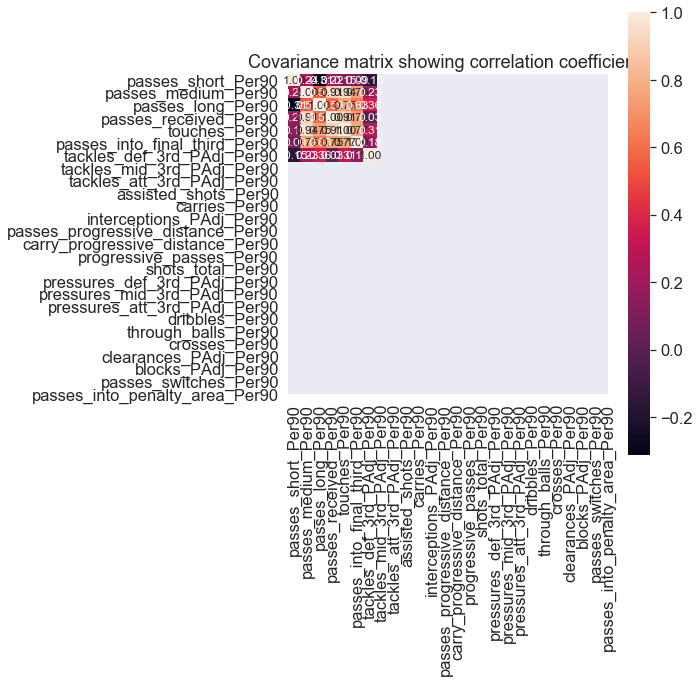

In [112]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=0.95)

In [84]:
pca.fit(X_train)

NameError: name 'X_train' is not defined

In [91]:
X_reduced = pca.fit_transform(X)

In [92]:
X_reduced

array([[ 2.62006311, -2.83068354, -1.12748028, ..., -0.07268999,
         0.13178385, -0.35842442],
       [-1.65081511,  2.81694451,  0.77468836, ...,  0.54771745,
         0.012958  , -0.04265354],
       [ 4.77191522,  2.84980674, -0.16453011, ..., -1.39382538,
         1.15595762,  0.95829172],
       ...,
       [-2.09497908, -0.67052484, -0.08313136, ...,  0.04307476,
        -0.08080748,  0.11561845],
       [-2.09413498,  0.95642295, -0.11977958, ...,  0.06089508,
         0.01072784, -0.36805142],
       [ 0.94522249, -0.90442353, -0.28336067, ..., -0.02326721,
         0.19080902, -0.40541621]])

In [96]:
pca.explained_variance_ratio_

array([0.31156306, 0.24746656, 0.1141679 , 0.06150123, 0.04880267,
       0.03375162, 0.02895315, 0.02362035, 0.01690174, 0.01556382,
       0.01363499, 0.01205192, 0.01196943, 0.01022101])

In [94]:
principalDf = pd.DataFrame(data=X_reduced)

In [95]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.620063,-2.830684,-1.127480,-0.089587,0.609114,1.274709,-0.015690,0.438434,-0.071351,-0.400090,-0.695507,-0.072690,0.131784,-0.358424
1,-1.650815,2.816945,0.774688,2.729035,-1.801578,1.881270,-2.622540,0.223051,0.166094,-0.011530,-1.036437,0.547717,0.012958,-0.042654
2,4.771915,2.849807,-0.164530,-1.152565,-2.907960,0.835243,-2.823622,2.174118,-0.294423,-0.672231,-0.235735,-1.393825,1.155958,0.958292
3,0.846465,0.458423,2.536094,0.671178,-2.430685,0.368306,0.301938,0.132002,-0.959814,-0.431540,0.107799,-0.604553,0.687477,-0.658516
4,-4.932476,-0.732769,-1.094573,-0.022577,0.595561,0.388256,-0.431354,-0.020590,-0.697268,0.031499,0.022900,0.498727,-0.361866,0.144531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,2.260156,-2.878880,-3.252849,0.188800,0.082947,0.187833,-0.264710,0.764804,0.763626,-0.448764,0.631938,-0.793142,-0.282309,-0.078821
1788,-2.825490,0.951450,-1.742793,0.306708,-0.841713,0.337751,0.890305,-0.446996,-0.686092,0.405044,0.299015,0.219807,-0.402341,-0.443244
1789,-2.094979,-0.670525,-0.083131,-0.254238,-0.422835,-0.534540,0.147503,-0.813037,-0.769915,0.854541,0.546097,0.043075,-0.080807,0.115618
1790,-2.094135,0.956423,-0.119780,1.261742,0.723958,0.969066,-0.219094,-1.033800,-0.533221,0.901693,1.141510,0.060895,0.010728,-0.368051


In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=5)

In [71]:
principalComponents = pca.fit_transform(x)

In [73]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [75]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.620063,-2.830683,-1.127481,-0.089710,0.609196
1,-1.650815,2.816943,0.774713,2.728948,-1.801773
2,4.771915,2.849805,-0.164553,-1.152031,-2.908063
3,0.846465,0.458425,2.536083,0.671147,-2.430620
4,-4.932476,-0.732769,-1.094583,-0.022406,0.595543
...,...,...,...,...,...
1787,2.260156,-2.878880,-3.252848,0.188721,0.082949
1788,-2.825490,0.951451,-1.742801,0.306630,-0.841648
1789,-2.094979,-0.670524,-0.083141,-0.254299,-0.422733
1790,-2.094135,0.956425,-0.119788,1.261593,0.723994


## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section9.1'>8.1. Bibliography</a>

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref
*    [FBref_EPL GitHub repository](https://github.com/chmartin/FBref_EPL) by [chmartin](https://github.com/chmartin) for the original web scraping code
*    [Scrape-FBref-data GitHub repository](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902) for the revised web scraping code for the new FBref metrics
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/).

#### Countries
*    [Comparison of alphabetic country codes Wiki](https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes)

## <a id='#section9.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)